# Importing Necessary Libraries for the analysis 

In [1]:
!pip install keras 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk      # for the text processing 
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Dropout

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup

In [4]:
# define constants
RANDOM_STATE =42

# Loading of reviews Dataset 🔋

P.S. 💡 Due to limitations in computational resources, I opted to load only a single .csv file

In [5]:
df_1 = pd.read_csv("C:\\Users\\91777\\Downloads\\Sephora Dataset\\reviews_0-250.csv", low_memory = False)

In [6]:
df_1.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


# Exploriong review Data

In [7]:
df_1.shape

(602130, 19)

In [8]:
df_1.isnull().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              117486
helpfulness                 331832
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                    999
review_title                167011
skin_tone                   106056
eye_color                   138488
skin_type                    74683
hair_color                  141081
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

# Since our objective is to construct a sentiment analysis model using the dataset, we will utilize the following features:-

review_text

rating

is_recommended

I assume is_recommended column is the target label , as a person will recommend a product while giving it a negative review.

In [9]:
df = df_1[['review_text' , 'is_recommended' , 'rating']]
# change column names
df.rename(columns={'review_text':'text', 'is_recommended':'label'},  inplace=True)
df.head()

df.label.value_counts()

C:\Users\91777\AppData\Local\Temp\ipykernel_10748\2813919057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'review_text':'text', 'is_recommended':'label'},  inplace=True)


1.0    406094
0.0     78550
Name: label, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   text    601131 non-null  object 
 1   label   484644 non-null  float64
 2   rating  602130 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 13.8+ MB


P.S. 💡 It's noticed that label is type float64 , so a castting to int is needed .

Let's before, check the values at label to make sure they are all numbers and to remove NAN.

In [11]:
df['label'].value_counts()

1.0    406094
0.0     78550
Name: label, dtype: int64

In [12]:
#Percentage of Positive/Negative
print("Positive: ", round(df.label.value_counts()[1]/len(df)*100 , 2 ),"%")
print("Negative: ", round(df.label.value_counts()[0]/len(df)*100, 2 ),"%")

Positive:  67.44 %
Negative:  13.05 %


We can see the negative and positive reviews are completely unmatched i.e our target variable is higly imbalanced 

# Handling of Imbalance data



Load two additional.csv files, then perform all the steps we've done before,including:-

Filter columns

Rename them


In [13]:
df_2 = pd.read_csv("C:\\Users\\91777\\Downloads\\Sephora Dataset\\reviews_250-500.csv")


df_2 = df_2[['review_text' , 'is_recommended' , 'rating']]

# changing column names
df_2.rename(columns={'review_text':'text', 'is_recommended':'label'}, inplace = True)
df_2.head()


,text,label,rating
0,Used to swear by this product but hate the sme...,0.0,2
1,I’ve only been using this for a week and my sk...,1.0,5
2,"Why, why, why would you change the formula?!!!...",0.0,1
3,I have used this product for years and it has ...,0.0,1
4,Great product for anti-aging Also great for da...,1.0,5


In [14]:
# Counts of positive / negative in df_2 dataset 
df_2.label.value_counts()

1.0    151316
0.0     29423
Name: label, dtype: int64

In [15]:
# similarly I will load one more dataset 
df_3 = pd.read_csv("C:\\Users\\91777\\Downloads\\Sephora Dataset\\reviews_750-1250.csv", low_memory =False)

#selecting columns
df_3 = df_3[['review_text' , 'is_recommended' , 'rating']]

# change columns names 
df_3.rename(columns = {'review_text':'text', 'is_recommended': 'label'}, inplace = True)
df_3.head()


,text,label,rating
0,This was gifted by Supergoop! in exchange for ...,0.0,2
1,I didn’t like it; too much product comes out w...,0.0,2
2,Y’all….I’m begging for everyone to read instru...,1.0,5
3,I have not figured out how to use this product...,0.0,1
4,I’m at a loss as to how to use this thing!!! C...,0.0,1


In [16]:
# Counts of positive / negative in df_2 dataset 
df_3.label.value_counts()

1.0    94797
0.0    15624
Name: label, dtype: int64

In [17]:
# Concat both Dataframe based on Negative review , so I can have dataset with only negative reviews.
df_conct = pd.concat([df_2, df_3], axis=0) 
# selecting rows based on condition 
df_neg = df_conct[df_conct['label'] == 0]

df_neg['label'].value_counts()

0.0    45047
Name: label, dtype: int64

In [18]:
# Concatenate the first imblanced df with the one with negtaive reviews.

df = pd.concat([df, df_neg])
df['label'].value_counts()

1.0    406094
0.0    123597
Name: label, dtype: int64

In [19]:
#Percentage of Positive/Negative
print("Positive: ", round(df.label.value_counts()[1]/len(df)*100 , 2 ),"%")
print("Negative: ", round(df.label.value_counts()[0]/len(df)*100, 2 ),"%")

Positive:  62.75 %
Negative:  19.1 %


I was able to address the issue of imbalanced data and improve the distribution from 67%:13% to 62%:19%.
However, even after this adjustment, our dataset remains imbalanced with a higher proportion of Positive reviews.

Here's where I opt to downsize the Majority class , so both classes will be equal

In [20]:
df_neg=  df[df['label'] == 0]
print('No. of Negtive class:' , len(df_neg))


df_pos=  df[df['label'] == 1].sample(len(df_neg))  # to downsize the positive reviews 
print('No. of taken samples of Positive class', len(df_pos))

No. of Negtive class: 123597
No. of taken samples of Positive class 123597


merging the Positive and Negative class samples into a single Dataframe and shuffle them.

**Shuffling is done to to make sure the data is in  a random order, which prevents it from memorizing the specific sequence and encourages it to learn the general patterns in the data.**

In [21]:
df= pd.concat([df_pos, df_neg], axis=0) 


In [22]:
# Shuffle the DataFrame rows
df = df.sample(frac=1, random_state=42)
df.head()

,text,label,rating
459209,I love this product! I use it in the morning t...,1.0,4
72173,This product leaves my skin looking and feelin...,1.0,4
88493,I received samples of this product to try out ...,0.0,3
454325,best mist i have ever used! Whenever i find my...,1.0,5
496125,I bought a foundation that broke out my entire...,1.0,5


In [23]:
#Percentage of Positive/Negative
print("Positive: ", round(df.label.value_counts()[1]/len(df)*100 , 2 ),"%")
print("Negative: ", round(df.label.value_counts()[0]/len(df)*100, 2 ),"%")

Positive:  50.0 %
Negative:  50.0 %


Our dataset currently has a balanced distribution of reviews, so we can proceed with the data exploration 👍

In [24]:
df.isnull().sum()

text      479
label       0
rating      0
dtype: int64

Since I thought it's expected that user may rate the product without typing a text review or vice versa , so I choose to drop rows with nullable values.

In [25]:
# drop rows with nullable values
shape_before = df.shape[0]
print('shape before :', df.shape)
df = df.dropna()
shape_after = df.shape[0]
df = df.reset_index(drop=True)
print('shape after :', df.shape)

print (shape_before-shape_after , ' rows were dropped')

shape before : (247194, 3)
shape after : (246715, 3)
479  rows were dropped


In [26]:
#Making sure no NN and values of columns are equally sized
print('Nullable Values:\n',df.isnull().sum(),'\n\n')
df.info()

Nullable Values:
 text      0
label     0
rating    0
dtype: int64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246715 entries, 0 to 246714
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   text    246715 non-null  object 
 1   label   246715 non-null  float64
 2   rating  246715 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ MB


In [27]:
#Convert single column to int dtype.
df['label'] = df['label'].astype('int')
# ensure the casting happened
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246715 entries, 0 to 246714
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    246715 non-null  object
 1   label   246715 non-null  int32 
 2   rating  246715 non-null  int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 4.7+ MB


In [28]:
# check samples of reviews 
def display_review(index_lst):
     for i in index_lst:
            display(HTML(f"<h5><b style='color:red'>Review: </b>{df['text'][i]}</h5>"))
            label = "negative" if df['label'][i] ==0 else "positive" 
            display(HTML(f"<h5><b style='color:red'>Target: </b>{label}</h5>"))
            display(HTML(f"<h5><b style='color:red'>Rating: </b>{df['rating'][i]}<br><hr></h5>"))       

In [29]:
from IPython.display import HTML


In [30]:
# generate an array or randome integers
index_lst= np.random.randint(1,len(df) ,5)
display_review(index_lst)

# Analyze & Visualize Data 🧐 🔍 📈 📊
Now , we are going to explore our train data to gain some insights 💡

In [31]:
#sentiment count in order to check data balance
df['label'].value_counts()

0    123399
1    123316
Name: label, dtype: int64

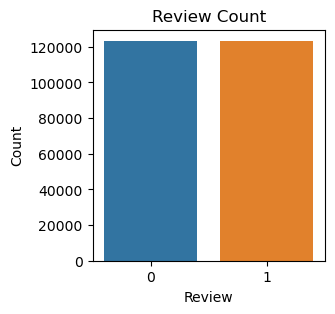

In [32]:
#Generating a countplot for target label
plt.figure(figsize=(3,3))
sns.barplot(x=df['label'].value_counts().index,y=df['label'].value_counts())
plt.title('Review Count')
plt.xlabel('Review')
plt.ylabel('Count');

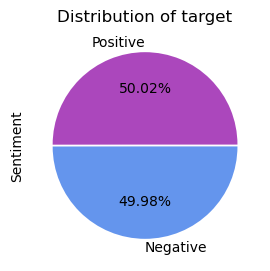

In [33]:
plt.figure(figsize=(10,3))
colors=['#AB47BC','#6495ED']
plt.pie(df['label'].value_counts(),labels=['Positive','Negative'],autopct='%.2f%%',explode=[0.01,0.01],colors=colors);
plt.title('Distribution of target')
plt.ylabel('Sentiment');

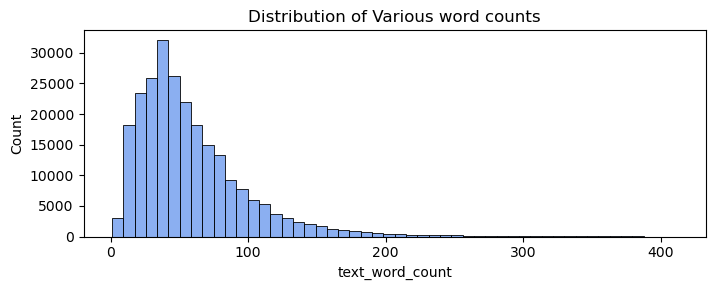

In [34]:
df['text_word_count']=df['text'].apply(lambda x:len(x.split()))

numerical_feature_cols=['text_word_count']
plt.figure(figsize=(20,3))
for i,col in enumerate(numerical_feature_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(data=df,x=col,bins=50,color='#6495ED')
    plt.title(f"Distribution of Various word counts")
plt.tight_layout()
plt.show()

 💡: The distribution of text word count is Right skewed and contains a lot of outliers.

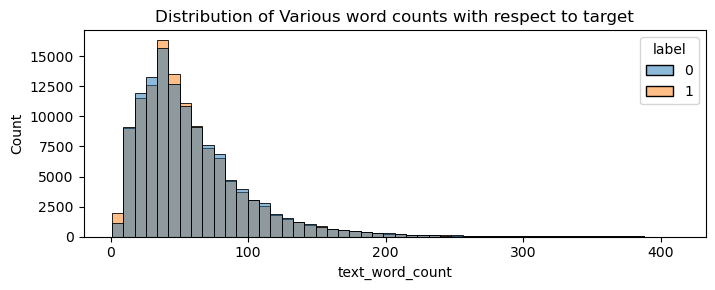

In [35]:
plt.figure(figsize=(20,3))
for i,col in enumerate(numerical_feature_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(data=df,x=col,hue='label',bins=50)
    plt.title(f"Distribution of Various word counts with respect to target")
plt.tight_layout()
plt.show()

In [36]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text


#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')
stop=set(stopwords.words('english'))

#Tokenization of text
tokenizer=ToktokTokenizer()

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [37]:
import re

In [38]:
#Apply function on review column
# html strips & square brackets were removed from the original text
print ('BEFORE (denoise_text).. \n',df['text'][2])
df['text']=df['text'].apply(denoise_text)
print ('\n AFTER (denoise_text).. \n ',df['text'][2])

BEFORE (denoise_text).. 
 I received samples of this product to try out so I was unable to test for long lasting effects. However, I would probably just opt for the face serum and place it in the eye area rather than buying a separate serum.


C:\Users\91777\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\91777\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(



 AFTER (denoise_text).. 
  I received samples of this product to try out so I was unable to test for long lasting effects. However, I would probably just opt for the face serum and place it in the eye area rather than buying a separate serum.


# Stemming & Lemmatization reviws text

In [39]:
print ('BEFORE (simple_stemmer).. \n',df['text'][2])
df['text']=df['text'].apply(simple_stemmer)
print ('\n AFTER (simple_stemmer) .. \n',df['text'][2])

BEFORE (simple_stemmer).. 
 I received samples of this product to try out so I was unable to test for long lasting effects. However, I would probably just opt for the face serum and place it in the eye area rather than buying a separate serum.

 AFTER (simple_stemmer) .. 
 i receiv sampl of thi product to tri out so i wa unabl to test for long last effects. however, i would probabl just opt for the face serum and place it in the eye area rather than buy a separ serum.


# Stop Words Removal

In [40]:
print ('BEFORE (remove_stopwords).. \n',df['text'][2])
df['text']=df['text'].apply(remove_stopwords)
print ('AFTER (remove_stopwords) .. \n',df['text'][2])

BEFORE (remove_stopwords).. 
 i receiv sampl of thi product to tri out so i wa unabl to test for long last effects. however, i would probabl just opt for the face serum and place it in the eye area rather than buy a separ serum.
AFTER (remove_stopwords) .. 
 receiv sampl thi product tri wa unabl test long last effects. however , would probabl opt face serum place eye area rather buy separ serum .


# Train | Validation | Test Sets 

In [41]:
# set aside 10% of data for test
df_train , df_test = train_test_split(df , test_size=0.10, shuffle = True, random_state = RANDOM_STATE)

# Using the same function above for the validation set , # set aside 20% of train data for validation
df_train , df_validation = train_test_split(df_train, test_size=0.25, random_state= RANDOM_STATE) 

In [42]:
#splitting data into (Features and Target)
def split_data (DATA_SET):

    # Initializing sentences and labels lists
    sentences = []
    labels = []

    # Loop over all  examples and save the sentences and labels
    for s,l in DATA_SET:
      sentences.append(s)
      labels.append(l)

    # Convert labels lists to numpy array
    labels_final = np.array(labels)

    return sentences, labels_final

    
train_sentences , train_labels  = split_data(df_train[['text','label']].values)
validation_sentences , validation_labels = split_data(df_validation[['text','label']].values)

In [43]:
print('Original set   ---> ',df.shape,
      '\nTraining set   ---> ',len(train_sentences),',',len(train_labels),
      '\nValidation set ---> ', len(validation_sentences),',', len(validation_labels),
      '\nTesting set    ---> ', df_test.shape)

Original set   --->  (246715, 4) 
Training set   --->  166532 , 166532 
Validation set --->  55511 , 55511 
Testing set    --->  (24672, 4)


# Bulid & Train Model

In [44]:
# Vocabulary size of the tokenizer
vocab_size = 10000
# Maximum length of the padded sequences
max_length = 32
# Output dimensions of the Embedding layer
embedding_dim = 16
# Dimensions of the LSTM layer
lstm_dim = 32
# Dimensions of the Dense layer
dense_dim = 6

NUM_EPOCHS = 20
BATCH_SIZE = 256

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Tokenization 

In [45]:
# Initializing the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(train_labels)
validation_labels = np.array(validation_labels)

In [46]:
import tensorflow as tf

In [47]:
# Build the model
model_lstm = tf.keras.Sequential ([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.SpatialDropout1D(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Setting  the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
import keras

In [49]:
# Train the model
history_lstm = model_lstm.fit(training_padded,
                              training_labels, 
                              epochs=NUM_EPOCHS, 
                              validation_data=(validation_padded, validation_labels),
                              verbose = 2)

Epoch 1/20
5205/5205 - 86s - loss: 0.3537 - accuracy: 0.8465 - val_loss: 0.3104 - val_accuracy: 0.8693 - 86s/epoch - 16ms/step
Epoch 2/20
5205/5205 - 75s - loss: 0.3032 - accuracy: 0.8735 - val_loss: 0.2949 - val_accuracy: 0.8753 - 75s/epoch - 14ms/step
Epoch 3/20
5205/5205 - 79s - loss: 0.2837 - accuracy: 0.8831 - val_loss: 0.2865 - val_accuracy: 0.8823 - 79s/epoch - 15ms/step
Epoch 4/20
5205/5205 - 77s - loss: 0.2703 - accuracy: 0.8896 - val_loss: 0.2785 - val_accuracy: 0.8852 - 77s/epoch - 15ms/step
Epoch 5/20
5205/5205 - 76s - loss: 0.2600 - accuracy: 0.8943 - val_loss: 0.2787 - val_accuracy: 0.8849 - 76s/epoch - 15ms/step
Epoch 6/20
5205/5205 - 82s - loss: 0.2516 - accuracy: 0.8984 - val_loss: 0.2891 - val_accuracy: 0.8855 - 82s/epoch - 16ms/step
Epoch 7/20
5205/5205 - 87s - loss: 0.2451 - accuracy: 0.9005 - val_loss: 0.2731 - val_accuracy: 0.8884 - 87s/epoch - 17ms/step
Epoch 8/20
5205/5205 - 75s - loss: 0.2389 - accuracy: 0.9048 - val_loss: 0.2749 - val_accuracy: 0.8872 - 75s/ep

# Results

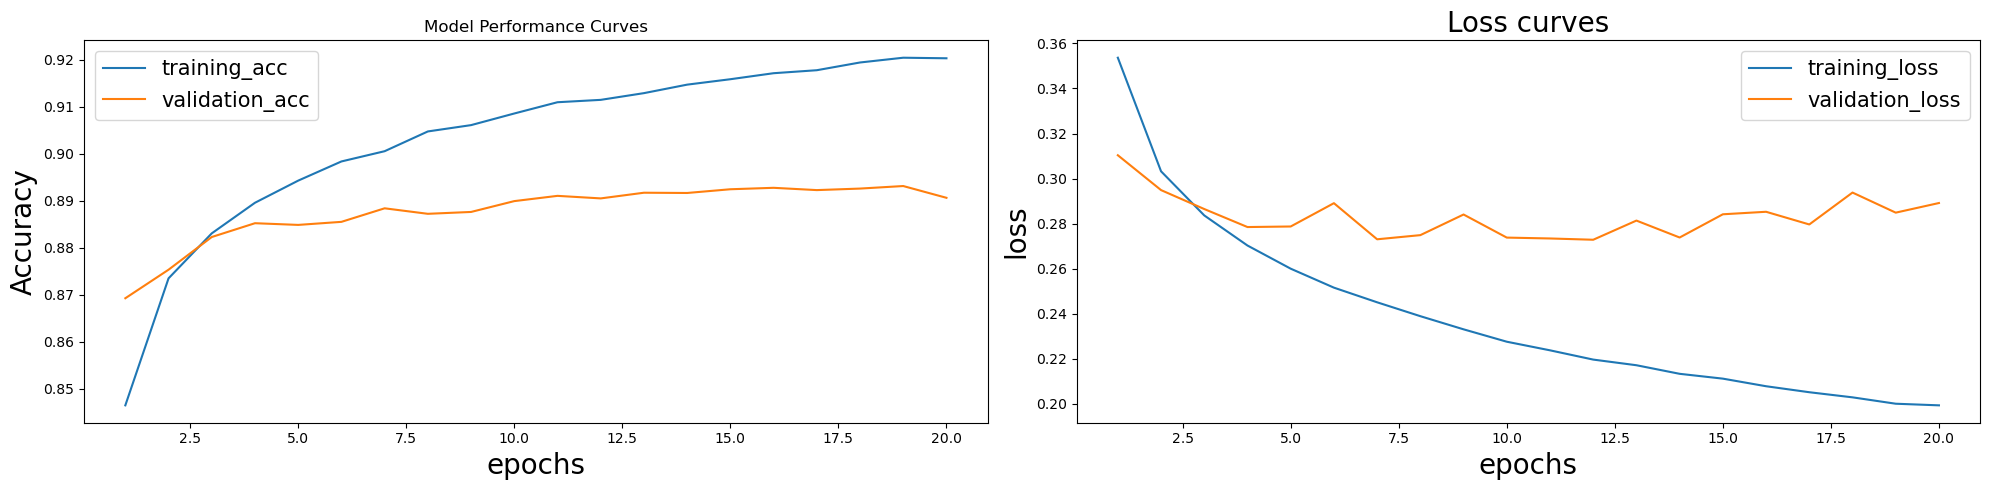

In [51]:
def plot_loss_curves(history):
    
    '''
      returns seperate loss curves for training and validation metrics
    '''

    train_loss=history.history['loss']
    val_loss=history.history['val_loss']

    train_accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']

    epochs=range(1,len(history.history['loss'])+1)
    plt.figure(figsize=(20,5))

    # plot loss data
    plt.subplot(1,2,2)
    plt.plot(epochs,train_loss,label="training_loss")
    plt.plot(epochs,val_loss,label="validation_loss")
    plt.title("Loss curves",size=20)
    plt.xlabel('epochs',size=20)
    plt.ylabel('loss',size=20)
    plt.legend(fontsize=15);
    # plt.show()

    
    # plot accuracy data
    plt.subplot(1,2,1)
    plt.plot(epochs,train_accuracy,label="training_acc")
    plt.plot(epochs,val_accuracy,label="validation_acc")
    plt.title("Accuracy curves",size=20)
    plt.xlabel('epochs',size=20)
    plt.ylabel('Accuracy',size=20)
    plt.tight_layout()
    plt.legend(fontsize=15);



    plt.title('Model Performance Curves')


plot_loss_curves(history_lstm)

Inference 💡: We may notice overfitting because validation accuracy is slowly dropping while the training accuracy is still going up.



# Test Model 
 Ps --> Performed the model tetsting on some random records in my dataset 

In [54]:
def review_test(index , test_df):

  text = test_df['text'].values[index]
  display(HTML(f"<h5><b style='color:red'>Text: </b>{text}</h5>"))


  true_label = test_df['label'].values[index]
  true_val = "negative" if true_label == 0 else "positive"
  display(HTML(f"<h5><b style='color:red'>Actual: </b>{true_val}</h5>"))

  #vectorizing the text by the pre-fitted tokenizer instance
  text = tokenizer.texts_to_sequences(text)

  #padding the text to have exactly the same shape as `embedding` input
  text = pad_sequences(text, maxlen=max_length, dtype='int32', value=0)


  sentiment = model_lstm.predict(text,batch_size=1,verbose = 2)[0]
  pred_val = "negative" if sentiment == 0 else "positive"
  display(HTML(f"<h5><b style='color:red'>Predicted: </b>{pred_val}</h5>"))

In [55]:
review_test(200,df_test)

265/265 - 1s - 1s/epoch - 4ms/step


In [56]:
review_test(250,df_test)

145/145 - 0s - 257ms/epoch - 2ms/step


In [61]:
review_test(2530, df_test)

763/763 - 1s - 1s/epoch - 2ms/step


# Accuracy , Recall , F1-Score 

In [65]:
from sklearn.metrics import recall_score
accuracy = history_lstm.history['val_accuracy'][-1]
print("Accuracy:", accuracy)



Accuracy: 0.890634298324585


In [70]:
predictions = model_lstm.predict(validation_padded)
predicted_classes = (predictions > 0.5).astype(int)

from sklearn.metrics import recall_score, f1_score, confusion_matrix

recall = recall_score(validation_labels, predicted_classes)
f1 = f1_score(validation_labels, predicted_classes)
conf_matrix = confusion_matrix(validation_labels, predicted_classes)

print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


1735/1735 [==============================] - 8s 3ms/step
Recall: 0.8728367464666859
F1 Score: 0.8885830167556754
Confusion Matrix:
[[25231  2544]
 [ 3527 24209]]


**The trained model exhibits positive behavior in sentiment analysis as it demonstrates high accuracy and effectiveness in classifying text sentiments. It effectively distinguishes between positive and negative sentiments, with a notable number of true positive and true negative predictions. The model's precision and recall values are well-balanced, indicating a good trade-off between correctly identifying positive sentiments and minimizing false negatives. Overall, the model's performance instills confidence in its ability to accurately classify sentiments, making it a valuable tool for sentiment analysis tasks.**

PS --> It can perform more better by better text pre processing but due to the limited computational resources I have done a more balanced kind of Sentimental Analyis of the Sephora Store Reviews